In [1]:
cd E:\study\MBA-652 SMBA

E:\study\MBA-652 SMBA


In [2]:
pwd

'E:\\study\\MBA-652 SMBA'

In [3]:
#import libraries
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

#Packages for feature engineering
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [4]:
#import data
travel=pd.read_csv("travel insurance.csv")
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [6]:
travel.Claim[travel.Claim == 'Yes'] = 1
travel.Claim[travel.Claim == 'No'] = 0
travel.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,NaN,41


In [7]:
# Checking the distribution of the claims

(travel.groupby('Claim').size()/travel.shape[0]).round(4)

Claim
0    0.9854
1    0.0146
dtype: float64

Text(0.5, 1.0, 'Count of each Target Class')

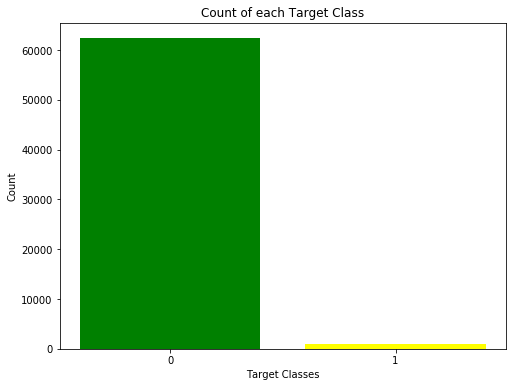

In [8]:
rcParams['figure.figsize'] = 8,6
plt.bar(travel['Claim'].unique(), travel['Claim'].value_counts(), color = ['green', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [9]:
# checking for the null values.

travel.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [10]:
# Checking the weightage of null values.

(travel['Gender'].isnull().sum()/travel.shape[0]*100).round(2)

71.23

In [11]:
# Check for unique Value in the DataFrame.

travel.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Claim                      2
Duration                 455
Destination              149
Net Sales               1139
Commision (in value)    1035
Gender                     2
Age                       89
dtype: int64

In [12]:
travel["Agency"].value_counts(dropna=False)

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

In [13]:
travel["Agency Type"].value_counts(dropna=False)

Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

In [14]:
travel["Distribution Channel"].value_counts(dropna=False)

Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

In [15]:
travel["Product Name"].value_counts(dropna=False)

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Annual Gold Plan                          194
Premier Plan                              194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [16]:
travel["Destination"].value_counts(dropna=False)

SINGAPORE                                 13255
MALAYSIA                                   5930
THAILAND                                   5894
CHINA                                      4796
AUSTRALIA                                  3694
INDONESIA                                  3452
UNITED STATES                              2530
PHILIPPINES                                2490
HONG KONG                                  2411
INDIA                                      2251
JAPAN                                      2061
VIET NAM                                   1669
KOREA, REPUBLIC OF                         1479
UNITED KINGDOM                             1309
TAIWAN, PROVINCE OF CHINA                  1090
MYANMAR                                     806
BRUNEI DARUSSALAM                           780
NEW ZEALAND                                 537
CANADA                                      528
CAMBODIA                                    493
FRANCE                                  

In [17]:
# Check for the maximum and minimum values to see if there are any invalid.

travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [18]:
# Calculate % of negative Duration Travels

(travel['Duration'] < 0).sum()/travel.shape[0]*100

0.007895651075387677

In [19]:
(travel['Duration'] > 731).sum()/travel.shape[0]*100

0.02368695322616303

In [20]:
# Now check the weightage of Age
(travel['Age'] > 99).sum()/travel.shape[0]*100

1.5538641316362947

In [21]:
# define a function to make age groups as children, adults and senior

def age_convert(age):
    result = ''
    if(age <= 21):
        result = 'Child'
    elif(age <= 50):
        result = 'Adult'
    else:
        result = 'Senior'
    return result

In [22]:
# Write a function for data preprocessing

def data_pre_processing(df):
    # Add a new column in the Database as Age Group

    df['Age Group'] = df['Age'].map(lambda x: age_convert(x))

    # Dropping Feature Gender
    df.drop('Gender',axis =1, inplace=True)
    
    # Since the minimum duration that any travel can have is 1 day thus we impute it by the column median.
    df['Duration'][df['Duration'] < 0] = df['Duration'].median()

    # As we observed duration of any travel cannot be more than 731 we will impute it as 731.
    df['Duration'][df['Duration'] > 731] = 731
    
    # replacing the values that is greater than 99 with the mean of Senior Age
    df['Age'][df['Age'] > 99] = df[df['Age Group'] == 'Senior']['Age'].mean()

In [23]:
data_pre_processing(travel)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,48.427281,40.702018,9.809992,39.158661
std,74.485447,48.845637,19.804388,10.562380
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,731.000000,810.000000,283.500000,88.000000


In [25]:
# Creating a dataframe dropping the features with datatype Object

travel_plot = travel.drop(['Agency','Agency Type','Destination','Distribution Channel','Product Name','Claim'], axis = 1)

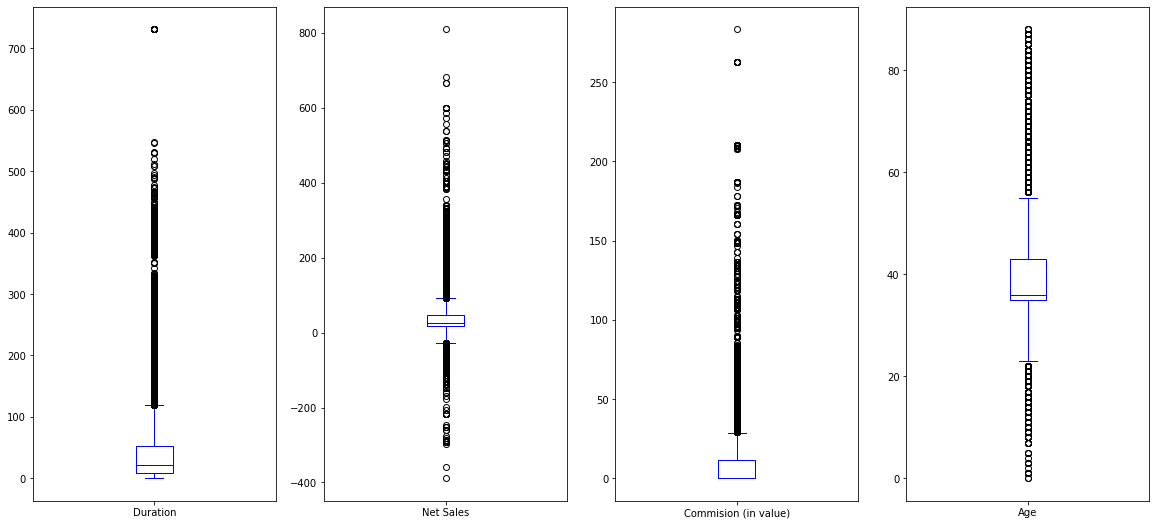

In [26]:
# box and whisker plots

travel_plot.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='blue')
plt.show()

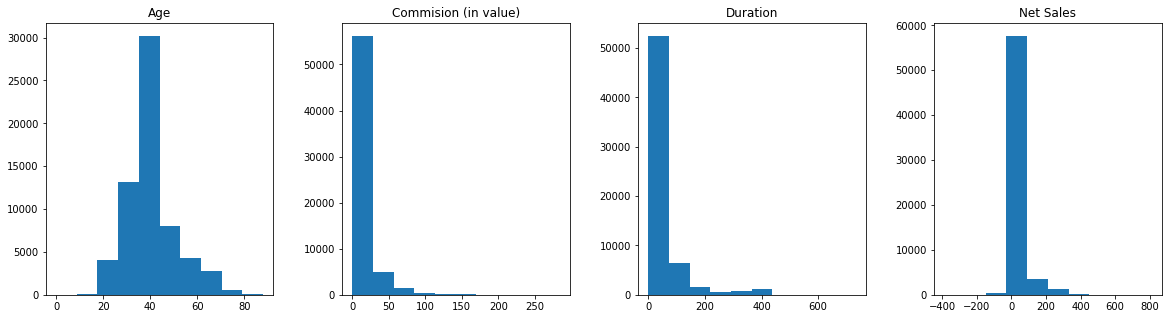

In [27]:
travel_plot.hist(grid=False,sharex=False,sharey=False,figsize=(20,5),layout=(1,4))
plt.show()

In [28]:
travel['Claim'] = travel['Claim'].astype(int)

In [29]:
# Finding the Agencies with the Maximum Claims

Claim_mean = (travel.groupby('Agency', as_index=False)['Claim'].mean()).nlargest(10,'Claim')
Claim_mean

,Agency,Claim
2,C2B,0.066167
11,LWC,0.052250
15,TTW,0.040816
10,KML,0.020408
4,CCR,0.015464
5,CSR,0.011628
6,CWT,0.010023
3,CBH,0.009901
13,SSI,0.006629
7,EPX,0.005553


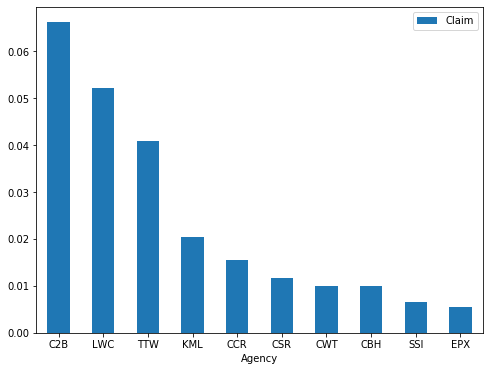

In [30]:
ax = Claim_mean.plot.bar(x='Agency', y='Claim', rot=0)

In [31]:
netsales_mean = (travel.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,111.510813
15,TTW,93.204082
2,C2B,78.865811
10,KML,55.448980
0,ADM,53.256098
8,JWT,53.012016
6,CWT,43.040769
5,CSR,32.802326
7,EPX,32.564993
9,JZI,32.338442


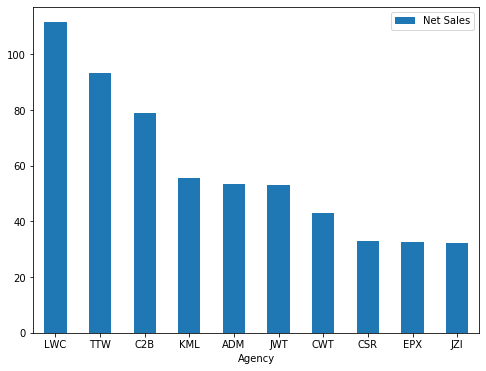

In [32]:
ax1 = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0)

Agency     
Claim              0    1
Agency Type              
Airlines       16866  591
Travel Agency  45533  336

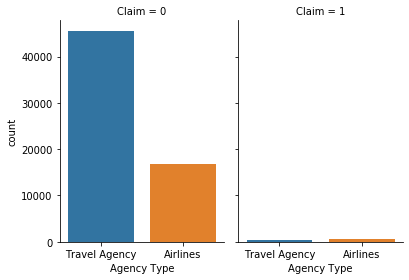

In [33]:
plot2 = sns.catplot(x="Agency Type", col="Claim",data=travel, kind="count",height=4, aspect=.7)
travel.pivot_table(index=['Agency Type'],columns=['Claim'], values=['Agency'], aggfunc='count')

In [34]:
travel.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'mean')

,Net Sales
Product Name,
1 way Comprehensive Plan,27.663464
2 way Comprehensive Plan,42.511704
24 Protect,22.772955
Annual Gold Plan,336.602320
Annual Silver Plan,218.851307
Annual Travel Protect Gold,246.940500
Annual Travel Protect Platinum,332.209434
Annual Travel Protect Silver,200.596512
Basic Plan,26.495337


In [35]:
travel.pivot_table(index = ['Age Group'], values = ['Net Sales'], aggfunc = 'count')

,Net Sales
Age Group,
Adult,53563
Child,778
Senior,8985


In [36]:
travel.groupby('Age Group')['Claim'].value_counts()

Age Group  Claim
Adult      0        52791
           1          772
Child      0          761
           1           17
Senior     0         8847
           1          138
Name: Claim, dtype: int64

<Figure size 288x288 with 0 Axes>

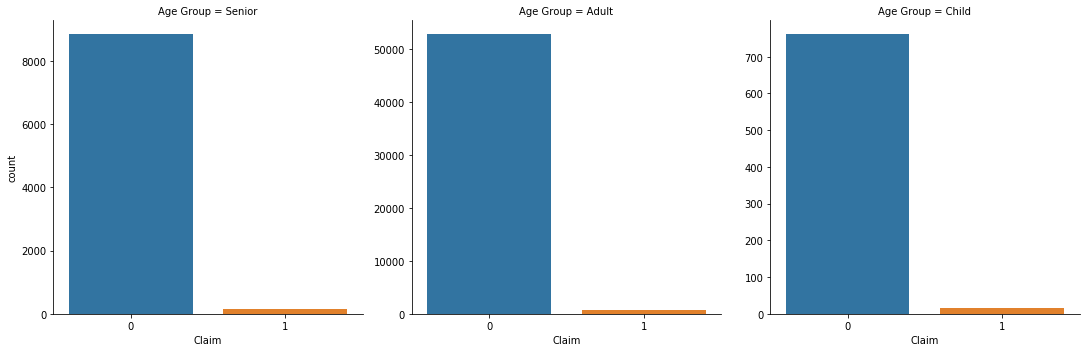

In [37]:
fig = plt.figure(figsize = (4,4))
sns.catplot('Claim', col = 'Age Group', data = travel, col_wrap =3, kind='count',sharey=False)

In [38]:
# Converting all IDs to sensible numbers (Risk of default - inspired by WOE)
travel['Destination_risk'] = travel.groupby('Destination')['Claim'].transform('mean')

In [39]:
def Coutry_Categories(value):
    result = ''
    if(value >= 0.3):
        result = '(1) High Risk - More than 30% Claimed'
    elif(value >= 0.2):
        result = '(2) Medium Risk - More than 20% Claimed'
    elif(value > 0):
        result = '(3) Low Risk - More than 1% Claimed'
    else:
        result = '(4) No Risk Countries'
    return result

In [40]:
travel['Risk of Countries'] = travel['Destination_risk'].map(lambda x: Coutry_Categories(x))

In [41]:
travel.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Age Group,Destination_risk,Risk of Countries
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81.0,Senior,0.003879,(3) Low Risk - More than 1% Claimed
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71.0,Senior,0.003879,(3) Low Risk - More than 1% Claimed
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32.0,Adult,0.010287,(3) Low Risk - More than 1% Claimed
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32.0,Adult,0.010287,(3) Low Risk - More than 1% Claimed
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41.0,Adult,0.019780,(3) Low Risk - More than 1% Claimed


In [42]:
# Multi colinearity detection
def plot_heatmap(df, fig_size=(10, 7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
    plt.show()

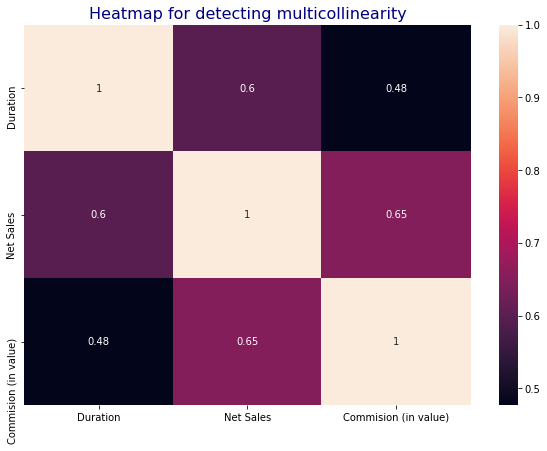

In [43]:
X = travel.drop(['Claim','Age','Destination_risk'], axis = 1)
plot_heatmap(X)

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [45]:
# setup the encoder
le = LabelEncoder()
df_travel4 = travel.copy()

# do the encoding for Agency
le.fit(df_travel4['Agency'])
df_travel4['Agency encoded'] = le.transform(df_travel4['Agency'])
df_travel5 = pd.concat([df_travel4, pd.get_dummies(df_travel4['Agency'])], axis=1)

# do the encoding for Agency Type
le.fit(df_travel5['Agency Type'])
df_travel5['Agency Type encoded'] = le.transform(df_travel5['Agency Type'])
df_travel6 = pd.concat([df_travel5, pd.get_dummies(df_travel5['Agency Type'])], axis=1)

# do the encoding for Distribution Channel
le.fit(df_travel6['Distribution Channel'])
df_travel6['Distribution Channel encoded'] = le.transform(df_travel6['Distribution Channel'])
df_travel7 = pd.concat([df_travel6, pd.get_dummies(df_travel6['Distribution Channel'])], axis=1)

# do the encoding for Product Name
le.fit(df_travel7['Product Name'])
df_travel7['Product Name encoded'] = le.transform(df_travel7['Product Name'])
df_travel8 = pd.concat([df_travel7, pd.get_dummies(df_travel7['Product Name'])], axis=1)

# do the encoding for Destination
le.fit(df_travel8['Destination'])
df_travel8['Destination encoded'] = le.transform(df_travel8['Destination'])
df_travel9 = pd.concat([df_travel8, pd.get_dummies(df_travel8['Destination'])], axis=1)

df_travel9.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,...,UNITED KINGDOM,UNITED STATES,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81.0,...,0,0,0,0,0,0,0,0,0,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71.0,...,0,0,0,0,0,0,0,0,0,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32.0,...,0,0,0,0,0,0,0,0,0,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32.0,...,0,0,0,0,0,0,0,0,0,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#check imbalance dataset
df_travel9["Claim"].value_counts(dropna=False)

0    62399
1      927
Name: Claim, dtype: int64

In [47]:
df_col=pd.DataFrame(df_travel9.columns)
df_col.columns=["Column_Name"]

In [48]:
# output to csv because we can't get it to print all of it
df_col.to_csv("travel_ins_col_names.csv")

In [49]:
#split dataset between features and target
features=['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW', 'Airlines', 'Travel Agency', 'Offline', 'Online', '1 way Comprehensive Plan', '2 way Comprehensive Plan', '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan', 'Annual Travel Protect Gold', 'Annual Travel Protect Platinum', 'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan', 'Cancellation Plan', 'Child Comprehensive Plan', 'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan', 'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan', 'Single Trip Travel Protect Gold', 'Single Trip Travel Protect Platinum', 'Single Trip Travel Protect Silver', 'Spouse or Parents Comprehensive Plan', 'Ticket Protector', 'Travel Cruise Protect', 'Travel Cruise Protect Family', 'Value Plan', 'ALBANIA', 'ANGOLA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAYMAN ISLANDS', 'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CROATIA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'ESTONIA', 'ETHIOPIA', 'FAROE ISLANDS', 'FIJI', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GUADELOUPE', 'GUAM', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HONG KONG', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REPUBLIC OF', 'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN', 'KAZAKHSTAN', 'KENYA', 'KOREA, REPUBLIC OF', 'KUWAIT', 'KYRGYZSTAN', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'LATVIA', 'LEBANON', 'LIBYAN ARAB JAMAHIRIYA', 'LITHUANIA', 'LUXEMBOURG', 'MACAO', 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MAURITIUS', 'MEXICO', 'MOLDOVA, REPUBLIC OF', 'MONGOLIA', 'MOROCCO', 'MYANMAR', 'NAMIBIA', 'NEPAL', 'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NIGERIA', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PAKISTAN', 'PANAMA', 'PAPUA NEW GUINEA', 'PERU', 'PHILIPPINES', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'REPUBLIC OF MONTENEGRO', 'REUNION', 'ROMANIA', 'RUSSIAN FEDERATION', 'RWANDA', 'SAMOA', 'SAUDI ARABIA', 'SENEGAL', 'SERBIA', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 'SLOVENIA', 'SOLOMON ISLANDS', 'SOUTH AFRICA', 'SPAIN', 'SRI LANKA', 'SWEDEN', 'SWITZERLAND', 'TAIWAN, PROVINCE OF CHINA', 'TAJIKISTAN', 'TANZANIA, UNITED REPUBLIC OF', 'THAILAND', 'TRINIDAD AND TOBAGO', 'TUNISIA', 'TURKEY', 'TURKMENISTAN', 'TURKS AND CAICOS ISLANDS', 'UGANDA', 'UKRAINE', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES', 'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VENEZUELA', 'VIET NAM', 'VIRGIN ISLANDS, U.S.', 'ZAMBIA', 'ZIMBABWE']
target = "Claim"

X = df_travel9.loc[:, features]
y = df_travel9[target]
X.head()

,Duration,Net Sales,Commision (in value),Age,ADM,ART,C2B,CBH,CCR,CSR,...,UNITED KINGDOM,UNITED STATES,URUGUAY,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE
0,186,-29.0,9.57,81.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,-29.0,9.57,71.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,-49.5,29.70,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60,-39.6,23.76,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79,-19.8,11.88,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#split between training and test set, default 4:1
X_train1, X_test1, y_train, y_test = train_test_split(X, y)
X_train1.shape, X_test1.shape, y_train.shape, y_test.shape

((47494, 196), (15832, 196), (47494,), (15832,))

In [51]:
# Do scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)

(47494, 2)
(47494,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


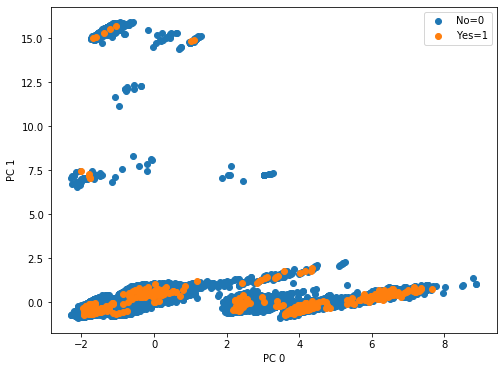

In [52]:
# Do PCA before and after SMOTE to see effects
pca_2d_before = PCA(n_components=2)
pca_2d_before.fit(X_train)
Z_train_pca_2d_before = pca_2d_before.transform(X_train)

print(Z_train_pca_2d_before.shape)
print(y_train.shape)
print(type(Z_train_pca_2d_before), type(y_train))

mask0 = (y_train == 0)
mask1 = (y_train == 1)

fig, ax = plt.subplots()

# ax.scatter(Z[:, 0], Z[:, 1]) # Z[:, 0] - first col, Z[:, 1], 2nd col

# numpy slicing arr[row, col]
ax.scatter(Z_train_pca_2d_before[mask0, 0], Z_train_pca_2d_before[mask0, 1], label='No=0')
ax.scatter(Z_train_pca_2d_before[mask1, 0], Z_train_pca_2d_before[mask1, 1], label='Yes=1')

ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.legend()
plt.show()

In [53]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Use smote to deal with imbalance data
from imblearn.over_sampling import SMOTE
import imblearn

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)
print(type(X_train), type(y_train))

Using TensorFlow backend.


(93642, 196) (93642,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [55]:
y_train.sum()

46821

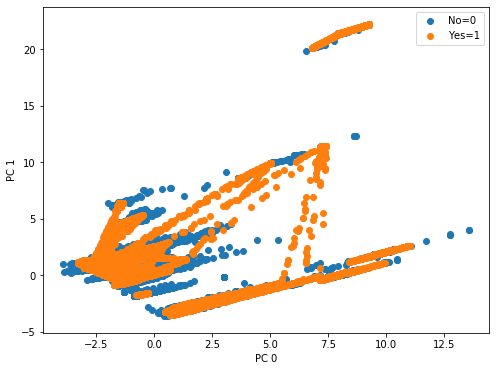

In [56]:
# pca
pca_2d = PCA(n_components=2)
pca_2d.fit(X_train)
Z_train_pca_2d = pca_2d.transform(X_train)

mask0 = (y_train == 0)
mask1 = (y_train == 1)

fig, ax = plt.subplots()

# numpy slicing arr[row, col]
ax.scatter(Z_train_pca_2d[mask0, 0], Z_train_pca_2d[mask0, 1], label='No=0')
ax.scatter(Z_train_pca_2d[mask1, 0], Z_train_pca_2d[mask1, 1], label='Yes=1')

ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.legend()
plt.show()

In [57]:
num_input_features = len(features)
num_input_features

196

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.9574911571500758
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15578
           1       0.07      0.13      0.09       254

    accuracy                           0.96     15832
   macro avg       0.53      0.55      0.53     15832
weighted avg       0.97      0.96      0.96     15832



In [60]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7675593734209196
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     15578
           1       0.05      0.76      0.10       254

    accuracy                           0.77     15832
   macro avg       0.52      0.77      0.48     15832
weighted avg       0.98      0.77      0.85     15832



C:\Users\room no. 3\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
